# Data Engineering

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import datetime as dt

## Forest Data

### Read and Convert Multiple Excel Sheets into a single DataFrame 

In [4]:
import pandas as pd
# Specify the file path
file_path = r"C:\Users\annie\DS\VScode\Capstone Project 2\Bird_Monitoring_Data_FOREST.XLSX"

# Read the Excel file with multiple sheets
excel_data = pd.ExcelFile(file_path)

# Get all sheet names
sheet_names = excel_data.sheet_names

# Read data from all sheets into a dictionary
sheets_dict = {sheet: excel_data.parse(sheet) for sheet in sheet_names}

In [5]:
# Example: Convert sheets_dict to a single DataFrame; this will add a new sheet column at the last.
combined_df = pd.concat(
    [df.assign(Sheet=sheet_name) for sheet_name, df in sheets_dict.items()],
    ignore_index=True
)

In [6]:
# later u can Drop the 'Sheet' column
forest_df = combined_df.drop(columns=['Sheet'])

In [7]:
forest_df.head()

,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,...,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt
0,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,83803,EATO,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
1,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,90935,WBNU,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
2,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,84865,RBWO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
3,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,93634,OROR,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
4,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,88394,NOMO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False


In [8]:
forest_df.shape

(8546, 29)

### Data Cleaning & Handling - Forest Data

#### Missing data

In [9]:
forest_df.count()

Admin_Unit_Code                8546
Sub_Unit_Code                   722
Site_Name                      8546
Plot_Name                      8546
Location_Type                  8546
Year                           8546
Date                           8546
Start_Time                     8546
End_Time                       8546
Observer                       8546
Visit                          8546
Interval_Length                8546
ID_Method                      8545
Distance                       8454
Flyover_Observed               8546
Sex                            3363
Common_Name                    8546
Scientific_Name                8546
AcceptedTSN                    8537
NPSTaxonCode                   8546
AOU_Code                       8546
PIF_Watchlist_Status           8546
Regional_Stewardship_Status    8546
Temperature                    8546
Humidity                       8546
Sky                            8546
Wind                           8546
Disturbance                 

In [10]:
# There are so many missing values in sub_unit code column
# Drop the 'Sub_Unit_Code' column
forest_df.drop(columns=['Sub_Unit_Code'],inplace=True)


In [48]:
forest_df.isnull().sum()

Admin_Unit_Code                   0
Site_Name                         0
Plot_Name                         0
Location_Type                     0
Year                              0
Date                              0
Start_Time                        0
End_Time                          0
Observer                          0
Visit                             0
Interval_Length                   0
ID_Method                         1
Distance                         92
Flyover_Observed                  0
Sex                            5183
Common_Name                       0
Scientific_Name                   0
AcceptedTSN                       9
NPSTaxonCode                      0
AOU_Code                          0
PIF_Watchlist_Status              0
Regional_Stewardship_Status       0
Temperature                       0
Humidity                          0
Sky                               0
Wind                              0
Disturbance                       0
Initial_Three_Min_Cnt       

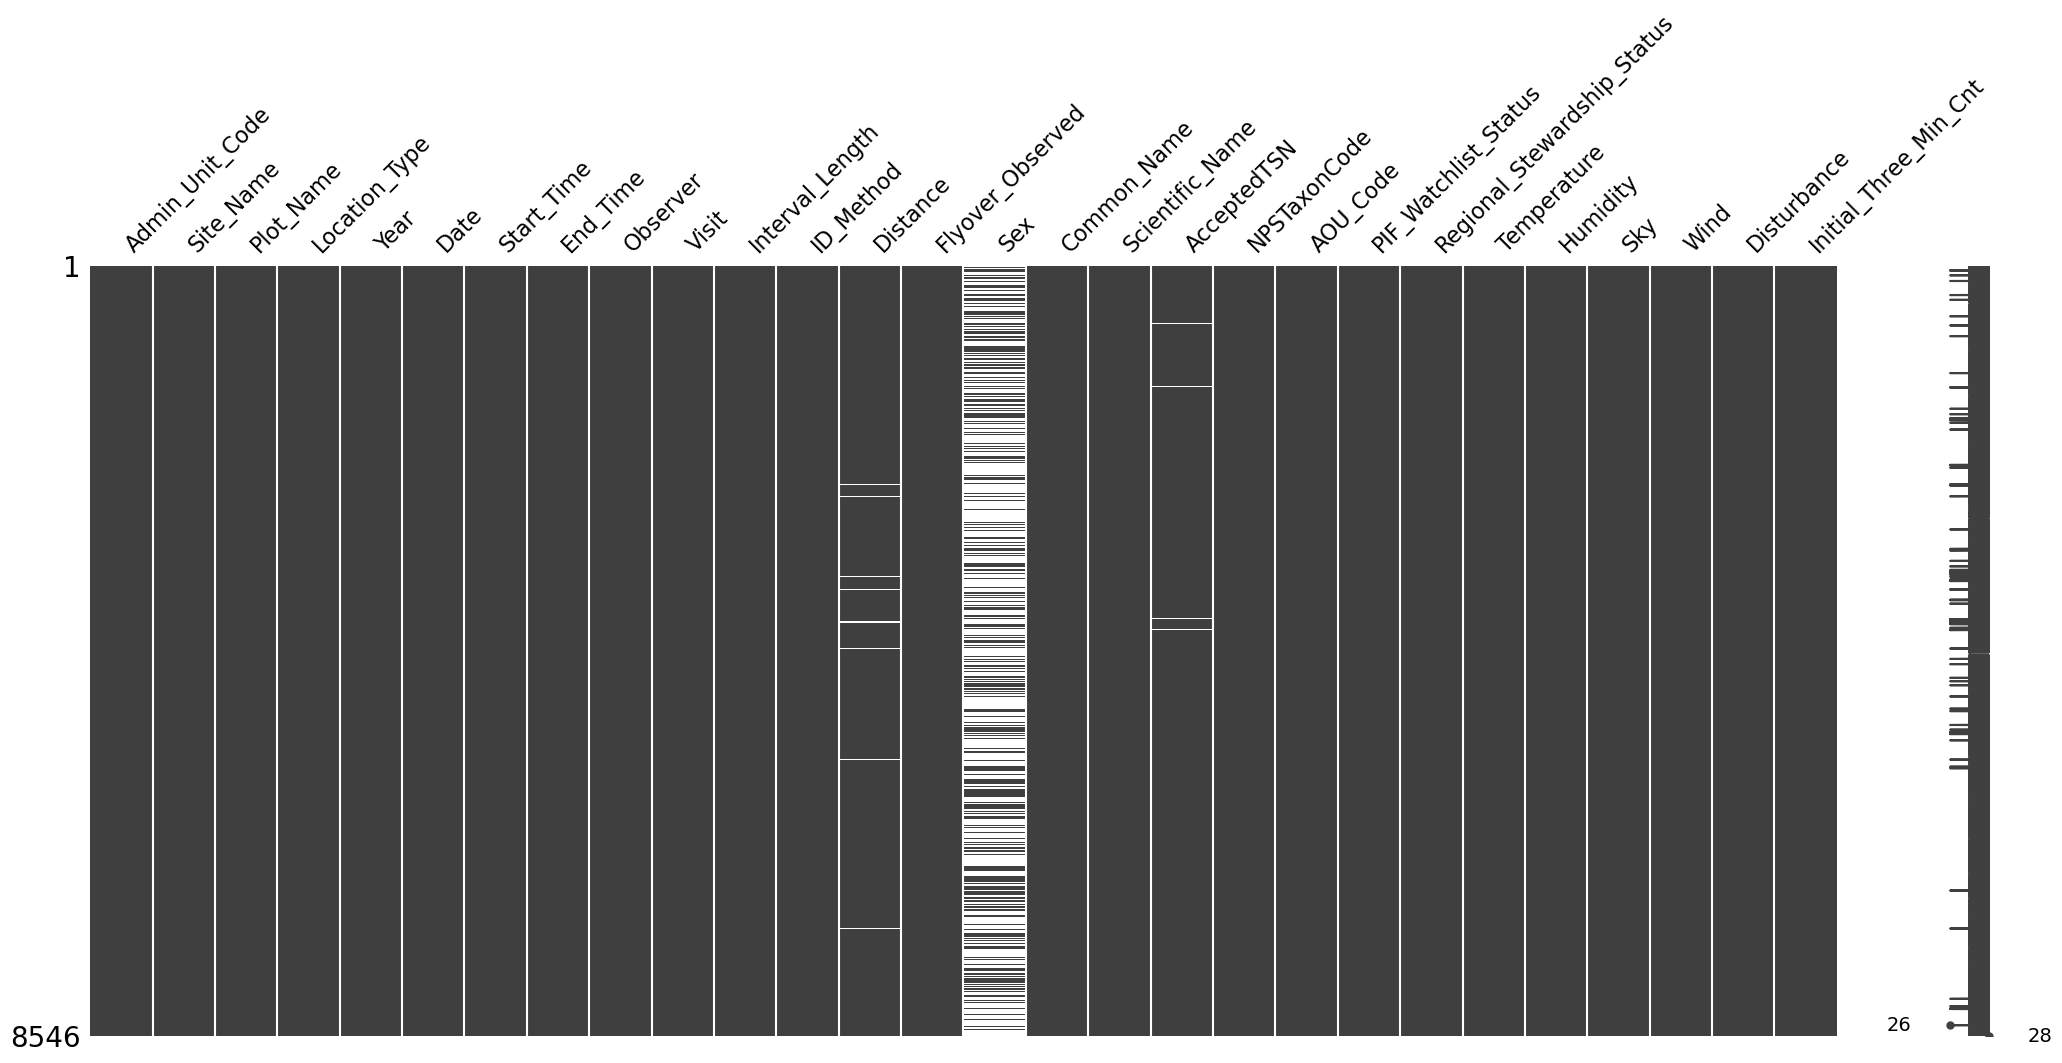

In [49]:
# To visualize where the missing values are
msno.matrix(forest_df)
plt.show()

In [50]:
# There are so many missing values in Sex column
# Drop the 'Sex' column
forest_df.drop(columns=['Sex'],inplace=True)

In [51]:
# Drop the the rows that are having Null values in 'AcceptedTSN'
forest_df.dropna(subset=["AcceptedTSN"],inplace=True)

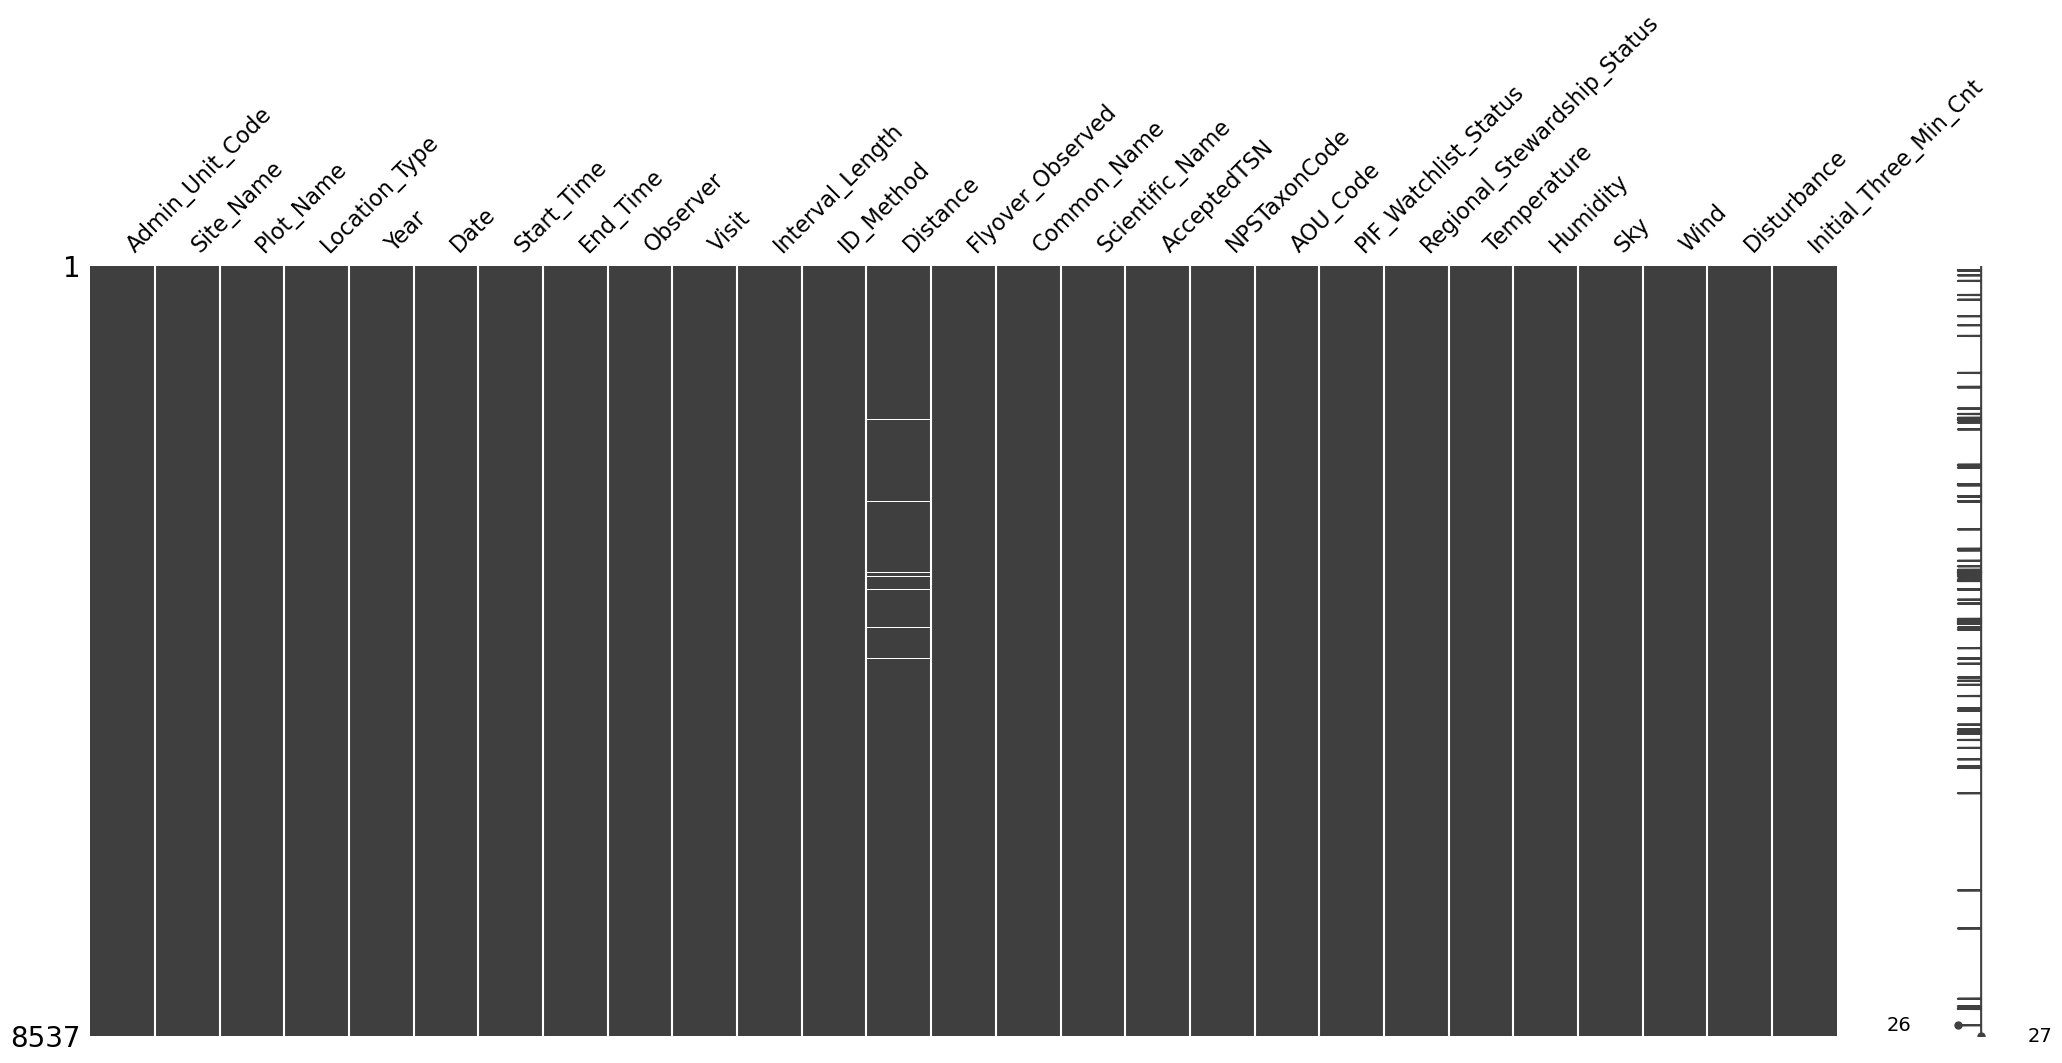

In [52]:
msno.matrix(forest_df)
plt.show()

#### Impute Missing Values

In [79]:
# Checking which distance values occurs the most and filling the missing values with the mode
distance_data=forest_df['Distance'].mode()[0]
forest_df['Distance'].fillna(distance_data,inplace=True)

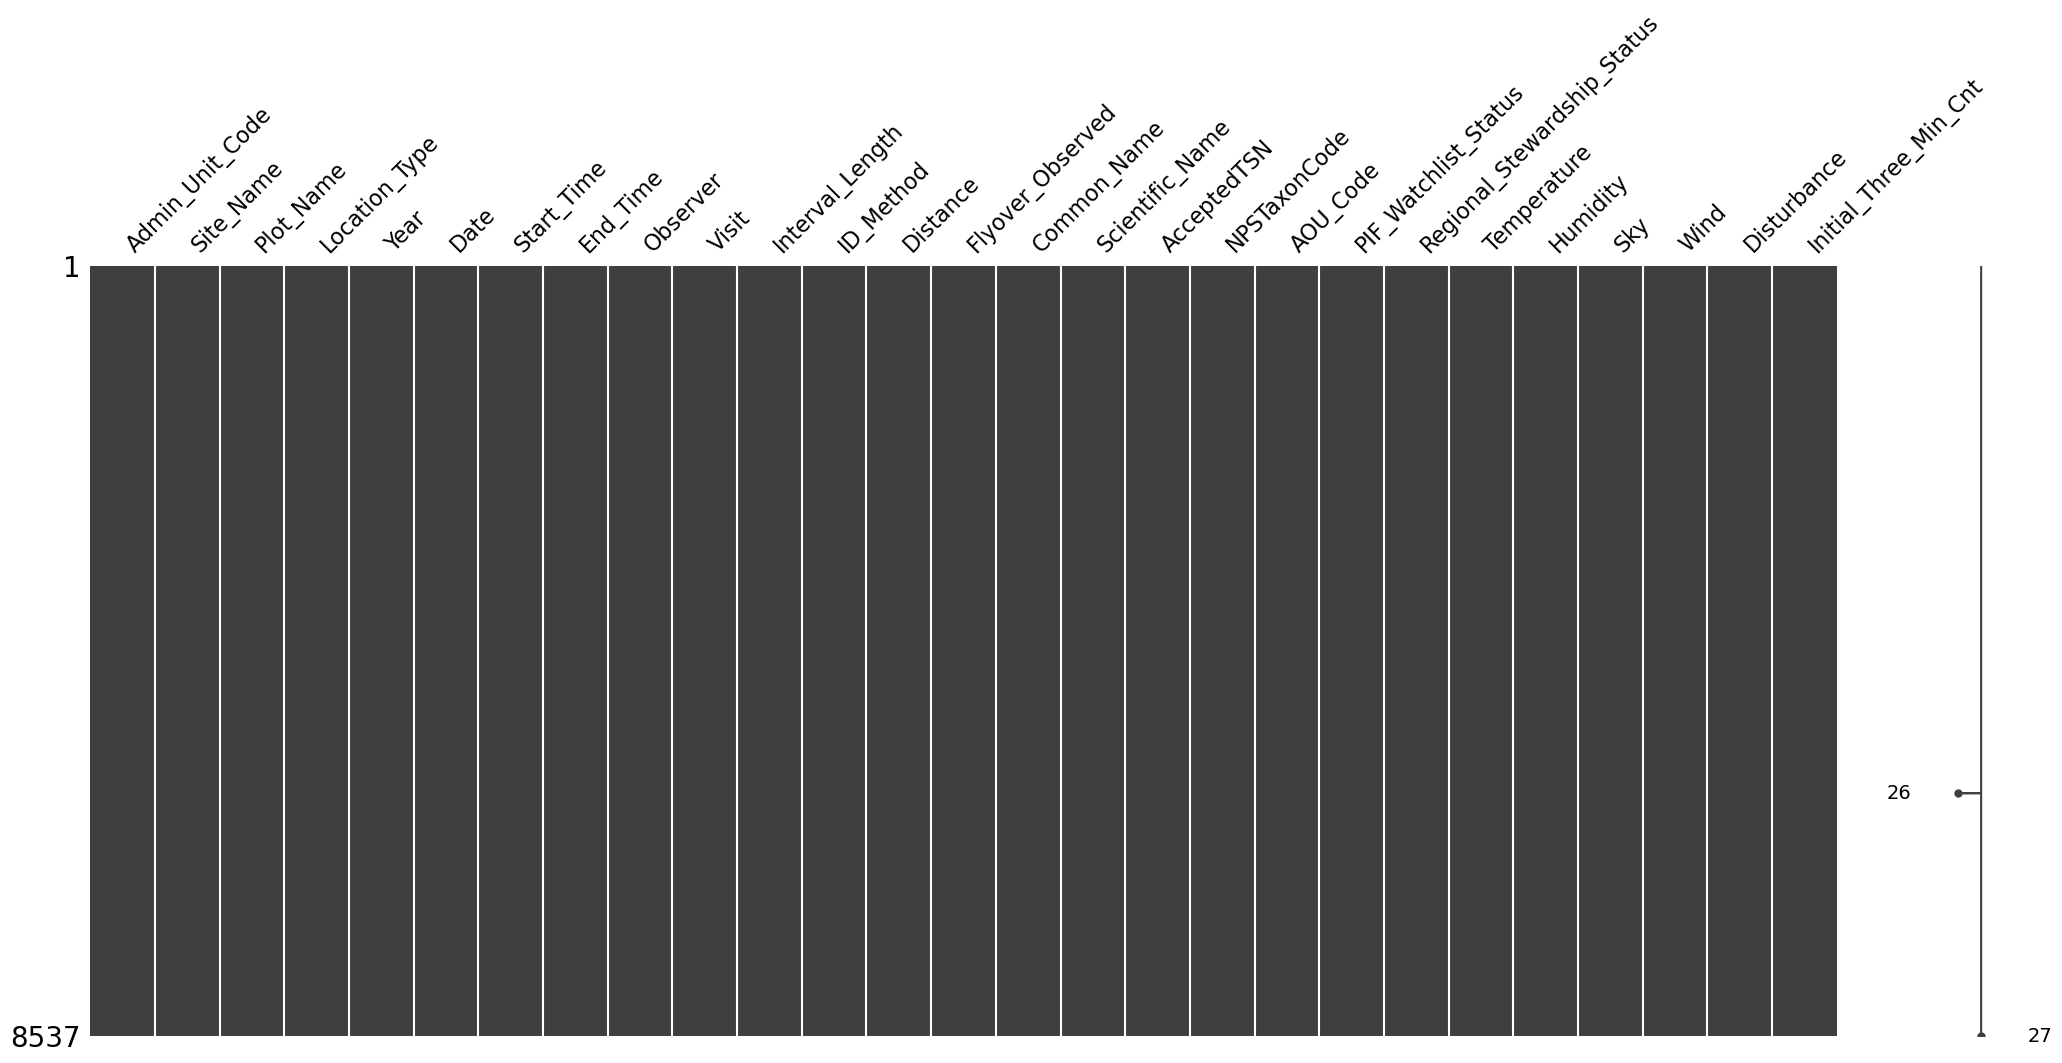

In [54]:
msno.matrix(forest_df)
plt.show()

In [55]:
forest_df.isnull().sum()

Admin_Unit_Code                0
Site_Name                      0
Plot_Name                      0
Location_Type                  0
Year                           0
Date                           0
Start_Time                     0
End_Time                       0
Observer                       0
Visit                          0
Interval_Length                0
ID_Method                      1
Distance                       0
Flyover_Observed               0
Common_Name                    0
Scientific_Name                0
AcceptedTSN                    0
NPSTaxonCode                   0
AOU_Code                       0
PIF_Watchlist_Status           0
Regional_Stewardship_Status    0
Temperature                    0
Humidity                       0
Sky                            0
Wind                           0
Disturbance                    0
Initial_Three_Min_Cnt          0
dtype: int64

In [87]:
# Filling the missing values in 'ID_Method' column with 'Singing'
forest_df['ID_Method'].fillna('Singing',inplace=True)

#### Remove duplicate rows

In [ ]:
#count the number of duplicate rows
forest_df.duplicated().sum()

27

In [90]:
forest_df.drop_duplicates(inplace=True)

In [91]:
forest_df.duplicated().sum()

0

#### Datatype Rectifications

In [57]:
forest_df.dtypes

Admin_Unit_Code                        object
Site_Name                              object
Plot_Name                              object
Location_Type                          object
Year                                    int64
Date                           datetime64[ns]
Start_Time                             object
End_Time                               object
Observer                               object
Visit                                   int64
Interval_Length                        object
ID_Method                              object
Distance                               object
Flyover_Observed                         bool
Common_Name                            object
Scientific_Name                        object
AcceptedTSN                           float64
NPSTaxonCode                            int64
AOU_Code                               object
PIF_Watchlist_Status                     bool
Regional_Stewardship_Status              bool
Temperature                       

In [58]:
forest_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8537 entries, 0 to 8545
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Admin_Unit_Code              8537 non-null   object        
 1   Site_Name                    8537 non-null   object        
 2   Plot_Name                    8537 non-null   object        
 3   Location_Type                8537 non-null   object        
 4   Year                         8537 non-null   int64         
 5   Date                         8537 non-null   datetime64[ns]
 6   Start_Time                   8537 non-null   object        
 7   End_Time                     8537 non-null   object        
 8   Observer                     8537 non-null   object        
 9   Visit                        8537 non-null   int64         
 10  Interval_Length              8537 non-null   object        
 11  ID_Method                    8537 non-null   obj

### DF to CSV

In [117]:
# Saving the DataFrame to CSV file
forest_df.to_csv("forest.csv",index=False)

In [118]:
Forest=pd.read_csv("C:/Users/annie/DS/VScode/Capstone Project 2/forest.csv")
Forest.head()

,Admin_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,...,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt
0,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,83803,EATO,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
1,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,90935,WBNU,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
2,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,84865,RBWO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
3,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,93634,OROR,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
4,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,88394,NOMO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False


In [ ]:
Forest.nunique()

Admin_Unit_Code                 11
Site_Name                       70
Plot_Name                      408
Location_Type                    1
Year                             1
Date                            57
Start_Time                     282
End_Time                       283
Observer                         3
Visit                            2
Interval_Length                  4
ID_Method                        3
Distance                         2
Flyover_Observed                 2
Common_Name                    107
Scientific_Name                107
AcceptedTSN                    107
NPSTaxonCode                   107
AOU_Code                       107
PIF_Watchlist_Status             2
Regional_Stewardship_Status      2
Temperature                    160
Humidity                       302
Sky                              5
Wind                             4
Disturbance                      4
Initial_Three_Min_Cnt            2
dtype: int64

## GrassLand Data

### Read and Convert Multiple Excel Sheets into a single DataFrame

In [11]:
import pandas as pd
# Specify the file path
file_path = r"C:\Users\annie\DS\VScode\Capstone Project 2\Bird_Monitoring_Data_GRASSLAND.XLSX"

# Read the Excel file with multiple sheets
excel_data = pd.ExcelFile(file_path)

# Get all sheet names
sheet_names = excel_data.sheet_names

# Read data from all sheets into a dictionary
sheets_dict = {sheet: excel_data.parse(sheet) for sheet in sheet_names}

In [12]:
# Example: Convert sheets_dict to a single DataFrame; this will add a new sheet column at the last.
combined_df = pd.concat(
    [df.assign(Sheet=sheet_name) for sheet_name, df in sheets_dict.items()],
    ignore_index=True
)

C:\Users\annie\AppData\Local\Temp\ipykernel_11544\3173835141.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(


In [13]:
# later u can Drop the 'Sheet' column
grassland_df = combined_df.drop(columns=['Sheet'])

In [14]:
grassland_df.head()

,Admin_Unit_Code,Sub_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,...,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt
0,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,CHSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
1,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,False
2,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,GRSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
3,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
4,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,FISP,False,True,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True


In [15]:
grassland_df.shape

(8531, 29)

### Data Cleaning & Handling

#### Missing Data

In [100]:
grassland_df.count()

Admin_Unit_Code                8531
Sub_Unit_Code                     0
Plot_Name                      8531
Location_Type                  8531
Year                           8531
Date                           8531
Start_Time                     8531
End_Time                       8531
Observer                       8531
Visit                          8531
Interval_Length                8531
ID_Method                      8530
Distance                       7137
Flyover_Observed               8531
Sex                            8531
Common_Name                    8531
Scientific_Name                8531
AcceptedTSN                    8507
TaxonCode                      8529
AOU_Code                       8531
PIF_Watchlist_Status           8531
Regional_Stewardship_Status    8531
Temperature                    8531
Humidity                       8531
Sky                            8531
Wind                           8531
Disturbance                    8531
Previously_Obs              

In [101]:
# There are so many missing values in sub_unit code column
# Drop the 'Sub_Unit_Code' column
grassland_df.drop(columns=['Sub_Unit_Code'],inplace=True)

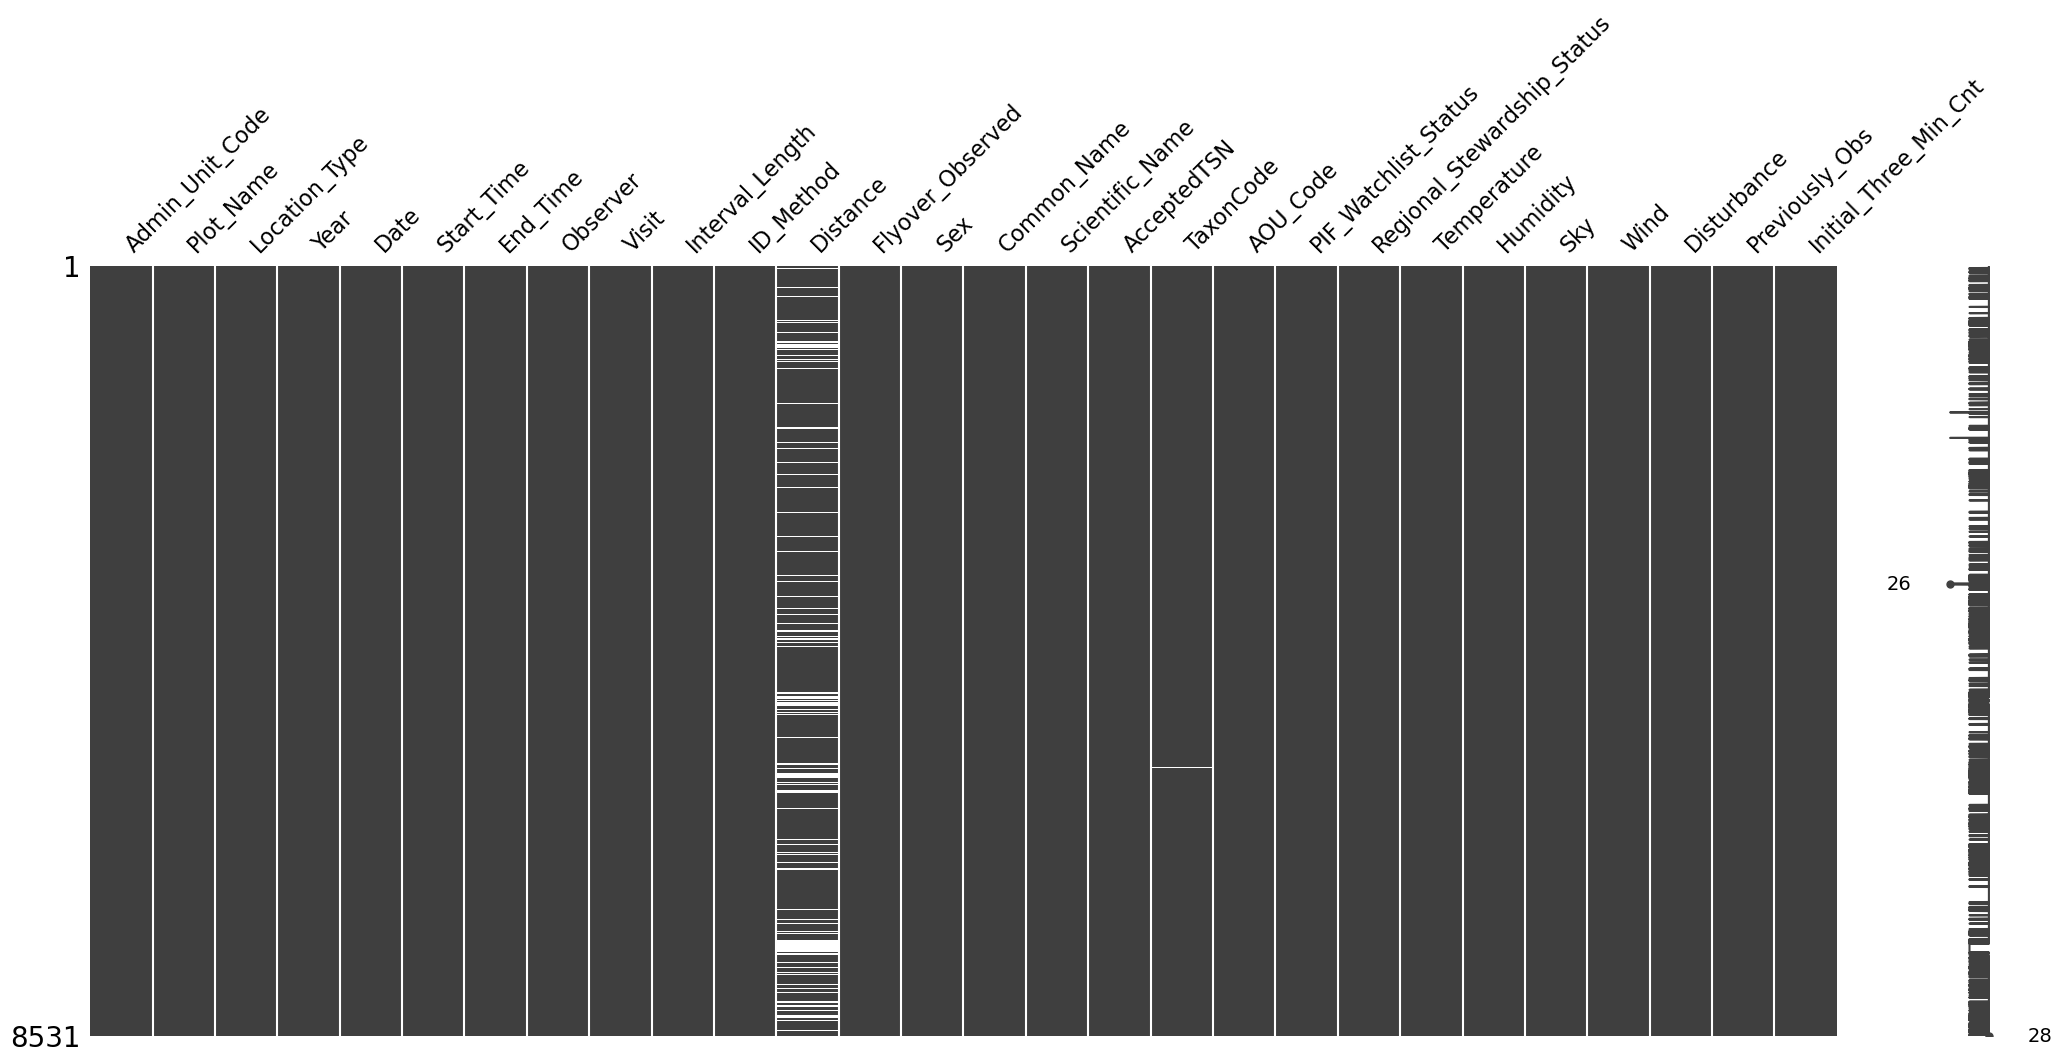

In [102]:
# To visualize where the missing values are
msno.matrix(grassland_df)
plt.show()

In [103]:
grassland_df.isnull().sum()

Admin_Unit_Code                   0
Plot_Name                         0
Location_Type                     0
Year                              0
Date                              0
Start_Time                        0
End_Time                          0
Observer                          0
Visit                             0
Interval_Length                   0
ID_Method                         1
Distance                       1394
Flyover_Observed                  0
Sex                               0
Common_Name                       0
Scientific_Name                   0
AcceptedTSN                      24
TaxonCode                         2
AOU_Code                          0
PIF_Watchlist_Status              0
Regional_Stewardship_Status       0
Temperature                       0
Humidity                          0
Sky                               0
Wind                              0
Disturbance                       0
Previously_Obs                    0
Initial_Three_Min_Cnt       

In [104]:
# Drop the the rows that are having Null values in 'AcceptedTSN'
grassland_df.dropna(subset=["AcceptedTSN"],inplace=True)

#### Impute Missing data

In [105]:
# Checking which distance values occurs the most and filling the missing values with the mode
distance_data=grassland_df['Distance'].mode()[0]
grassland_df['Distance'].fillna(distance_data,inplace=True)

C:\Users\annie\AppData\Local\Temp\ipykernel_7448\3998150020.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  grassland_df['Distance'].fillna(distance_data,inplace=True)


In [106]:
# Filling the missing values in 'ID_Method' column with 'Singing'
grassland_df['ID_Method'].fillna('Singing',inplace=True)

C:\Users\annie\AppData\Local\Temp\ipykernel_7448\4020669626.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  grassland_df['ID_Method'].fillna('Singing',inplace=True)


In [107]:
grassland_df.isnull().sum()

Admin_Unit_Code                0
Plot_Name                      0
Location_Type                  0
Year                           0
Date                           0
Start_Time                     0
End_Time                       0
Observer                       0
Visit                          0
Interval_Length                0
ID_Method                      0
Distance                       0
Flyover_Observed               0
Sex                            0
Common_Name                    0
Scientific_Name                0
AcceptedTSN                    0
TaxonCode                      2
AOU_Code                       0
PIF_Watchlist_Status           0
Regional_Stewardship_Status    0
Temperature                    0
Humidity                       0
Sky                            0
Wind                           0
Disturbance                    0
Previously_Obs                 0
Initial_Three_Min_Cnt          0
dtype: int64

In [108]:
Taxon=grassland_df['TaxonCode'].mode()[0]
grassland_df['TaxonCode'].fillna(Taxon,inplace=True)

C:\Users\annie\AppData\Local\Temp\ipykernel_7448\840120166.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  grassland_df['TaxonCode'].fillna(Taxon,inplace=True)


In [109]:
grassland_df.isnull().sum()

Admin_Unit_Code                0
Plot_Name                      0
Location_Type                  0
Year                           0
Date                           0
Start_Time                     0
End_Time                       0
Observer                       0
Visit                          0
Interval_Length                0
ID_Method                      0
Distance                       0
Flyover_Observed               0
Sex                            0
Common_Name                    0
Scientific_Name                0
AcceptedTSN                    0
TaxonCode                      0
AOU_Code                       0
PIF_Watchlist_Status           0
Regional_Stewardship_Status    0
Temperature                    0
Humidity                       0
Sky                            0
Wind                           0
Disturbance                    0
Previously_Obs                 0
Initial_Three_Min_Cnt          0
dtype: int64

#### Remove duplicate rows

In [110]:
#count the number of duplicate rows
grassland_df.duplicated().sum()

1700

In [111]:
grassland_df.drop_duplicates(inplace=True)

In [112]:
grassland_df.duplicated().sum()

0

#### Datatype Rectification

In [114]:
grassland_df.head()

,Admin_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,...,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt
0,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,...,CHSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
1,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,7.5 - 10 min,...,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,False
2,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,...,GRSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
3,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,...,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
4,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,...,FISP,False,True,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True


In [113]:
grassland_df.dtypes

Admin_Unit_Code                        object
Plot_Name                              object
Location_Type                          object
Year                                   object
Date                           datetime64[ns]
Start_Time                             object
End_Time                               object
Observer                               object
Visit                                  object
Interval_Length                        object
ID_Method                              object
Distance                               object
Flyover_Observed                       object
Sex                                    object
Common_Name                            object
Scientific_Name                        object
AcceptedTSN                           float64
TaxonCode                             float64
AOU_Code                               object
PIF_Watchlist_Status                   object
Regional_Stewardship_Status            object
Temperature                       

In [116]:
# Rectifying the data types of each column
grassland_df['Year'] = grassland_df['Year'].astype('int')
grassland_df['Visit'] = grassland_df['Visit'].astype('float')
grassland_df['Flyover_Observed'] = grassland_df['Flyover_Observed'].astype('bool')
grassland_df['PIF_Watchlist_Status'] = grassland_df['PIF_Watchlist_Status'].astype('bool')
grassland_df['Regional_Stewardship_Status'] = grassland_df['Regional_Stewardship_Status'].astype('bool')
grassland_df['Initial_Three_Min_Cnt'] = grassland_df['Initial_Three_Min_Cnt'].astype('bool')
# Print dtypes again
grassland_df.dtypes

Admin_Unit_Code                        object
Plot_Name                              object
Location_Type                          object
Year                                    int32
Date                           datetime64[ns]
Start_Time                             object
End_Time                               object
Observer                               object
Visit                                 float64
Interval_Length                        object
ID_Method                              object
Distance                               object
Flyover_Observed                         bool
Sex                                    object
Common_Name                            object
Scientific_Name                        object
AcceptedTSN                           float64
TaxonCode                             float64
AOU_Code                               object
PIF_Watchlist_Status                     bool
Regional_Stewardship_Status              bool
Temperature                       

### DF to CSV

In [119]:
# Saving the DataFrame to CSV file
grassland_df.to_csv("grassland.csv",index=False)

In [121]:
Grassland=pd.read_csv(r"C:\Users\annie\DS\VScode\Capstone Project 2\grassland.csv")
Grassland.head()

,Admin_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,...,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt
0,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1.0,0-2.5 min,...,CHSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
1,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1.0,7.5 - 10 min,...,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,False
2,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1.0,0-2.5 min,...,GRSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
3,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1.0,0-2.5 min,...,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
4,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1.0,0-2.5 min,...,FISP,False,True,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True


In [122]:
Grassland.nunique()

Admin_Unit_Code                  4
Plot_Name                      201
Location_Type                    1
Year                             1
Date                            26
Start_Time                     273
End_Time                       276
Observer                         3
Visit                            3
Interval_Length                  4
ID_Method                        3
Distance                         2
Flyover_Observed                 2
Sex                              3
Common_Name                    106
Scientific_Name                106
AcceptedTSN                    106
TaxonCode                      104
AOU_Code                       106
PIF_Watchlist_Status             2
Regional_Stewardship_Status      2
Temperature                    188
Humidity                       325
Sky                              5
Wind                             4
Disturbance                      4
Previously_Obs                   1
Initial_Three_Min_Cnt            2
dtype: int64

## Combined Dataset

In [16]:
combined_df = pd.concat([forest_df, grassland_df], ignore_index=True)
combined_df.head()

,Admin_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,...,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,Sub_Unit_Code,TaxonCode,Previously_Obs
0,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,NaN,NaN,NaN
1,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,NaN,NaN,NaN
2,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,NaN,NaN,NaN
3,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,NaN,NaN,NaN
4,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,NaN,NaN,NaN


In [17]:
# Saving the DataFrame to CSV file
combined_df.to_csv("combined.csv",index=False)